In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import MDAnalysis as mda
import string

# Plot of the radial coordinate

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/2445792332.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  rho = plumed.read_as_pandas("rtp_coord.dat")


Text(0, 0.5, '$\\rho$ [nm]')

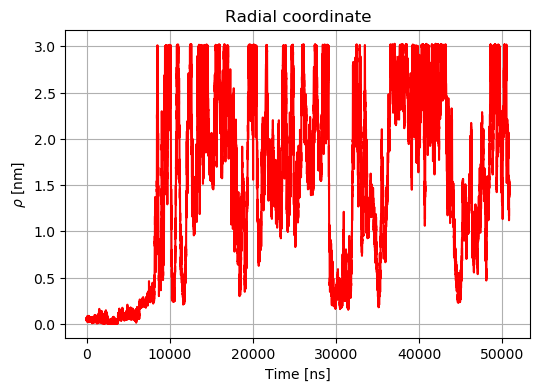

In [9]:
rho = plumed.read_as_pandas("rtp_coord.dat")
plt.plot(rho["time"], rho["rho"], 'r')
plt.grid()
plt.title("Radial coordinate")
plt.xlabel("Time [ns]")
plt.ylabel(r"$\rho$ [nm]")

# Reading the `HILLS` file 

The profile obtained as a function of $\rho$ (marginalizing $\theta$ and $\phi$) has to be corrected:
$$
\Delta G^0_b=\Delta G_{\text{meta}}-RT\log \frac{V^0}{\frac{4\pi \rho_s^3}{3}-V_{\text{prot}}}
$$

```
plumed sum_hills --hills HILLS --mintozero --idw rho --kt 2.577483
```



/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/3734516455.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

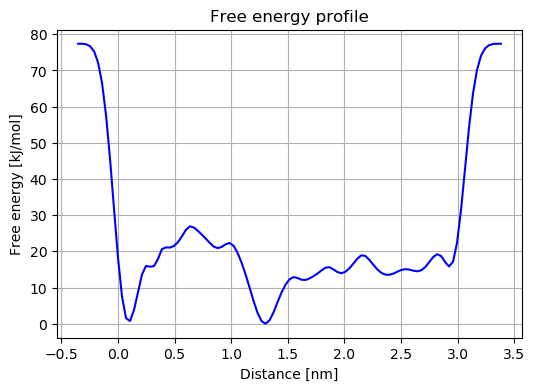

In [7]:
plt.rcParams["figure.figsize"] = (6, 4)
fes = plumed.read_as_pandas("fes.dat")
plt.plot(fes["rho"], fes["projection"], 'b')
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

# Evolution of the profile in time

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/1338715333.py:8: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/1338715333.py:8: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/1338715333.py:8: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/1338715333.py:8: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/1338715333.py:8: UserWarning: cannot load PLUMED instance, conversions will not be avail

Text(0, 0.5, 'Free energies [kJ/mol]')

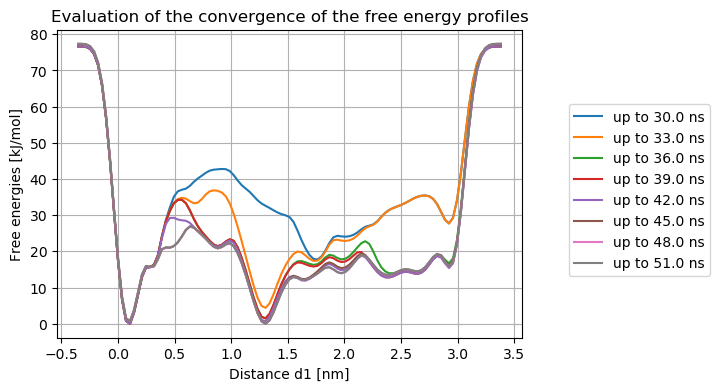

In [8]:
# 51099 kernels --> circa 51 ns


stride = 3000

for i in range(10, 18):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
    plt.plot(data["rho"],data["projection"], label="up to "+str(i * stride/1000)+" ns")

plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
plt.legend(loc=(1.1, 0.2))
plt.xlabel("Distance d1 [nm]")
plt.ylabel("Free energies [kJ/mol]")